In [ ]:
# CONTENTS LIST:
#1. Create subset of data

#2. Create average kill counts column

#3. Set the "Date" column as the index

#4. Reset index to use the "Date" column as a filter

#5. Plot the new data set 

#6. Adjust the datetime x-axis

#7. Decompose the time series 

#8.  Conduct a Dickey-Fuller test to check for stationarity and interpret the results

#9. Plot autocorrelations

#10. Conduct differencing to stationarize data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path=r"C:\Users\HP\03-2024 Gun Violence"

In [3]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/7/24

#Description: Importing of Project 6 Sex Grouped Date Separated.csv
"""

gun_vio =pd.read_csv(os.path.join(path,"02 Data","Prepared Data","Project 6 Sex Grouped Date Separated.csv"),index_col= False)

In [4]:
# Define data type for specific column
data_types = {
    'date': 'datetime64'}

In [5]:
file_path = os.path.join(path,"02 Data","Prepared Data","Project 6 Sex Grouped Date Separated.csv")

In [6]:
parse_dates = ['date']

In [7]:
gun_vio = pd.read_csv(file_path, parse_dates=parse_dates)

In [8]:
gun_vio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227733 entries, 0 to 227732
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_id               227733 non-null  int64         
 1   date                      227733 non-null  datetime64[ns]
 2   state                     227733 non-null  object        
 3   city_or_county            227733 non-null  object        
 4   address_of_incident       211686 non-null  object        
 5   count_killed              227733 non-null  int64         
 6   count_of_injured          227733 non-null  int64         
 7   congressional_district    227733 non-null  int64         
 8   gun_stolen                128283 non-null  object        
 9   gun_type                  128301 non-null  object        
 10  incident_details          227411 non-null  object        
 11  latitude                  227723 non-null  float64       
 12  lo

In [9]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/7/24

#Description: Subsetting data 
"""

gun_vio_counts = gun_vio.groupby(gun_vio['date'].dt.date)['date'].count()

In [10]:
gun_vio_counts

date
2013-01-01      3
2013-01-05      1
2013-01-07      2
2013-01-19      1
2013-01-21      2
             ... 
2018-03-27     91
2018-03-28    113
2018-03-29     94
2018-03-30     83
2018-03-31     83
Name: date, Length: 1724, dtype: int64

In [11]:
#Creating average kill counts column

avg_incident = gun_vio.groupby('date')['count_killed'].mean()

In [12]:
avg_incident

date
2013-01-01    0.666667
2013-01-05    4.000000
2013-01-07    3.000000
2013-01-19    5.000000
2013-01-21    0.000000
                ...   
2018-03-27    0.164835
2018-03-28    0.256637
2018-03-29    0.297872
2018-03-30    0.361446
2018-03-31    0.506024
Name: count_killed, Length: 1724, dtype: float64

In [13]:
result = pd.DataFrame({'Date': gun_vio_counts.index, 'count_killed': gun_vio_counts.values, 'avg_killed': avg_incident.values})

In [14]:
result

,Date,count_killed,avg_killed
0,2013-01-01,3,0.666667
1,2013-01-05,1,4.000000
2,2013-01-07,2,3.000000
3,2013-01-19,1,5.000000
4,2013-01-21,2,0.000000
...,...,...,...
1719,2018-03-27,91,0.164835
1720,2018-03-28,113,0.256637
1721,2018-03-29,94,0.297872
1722,2018-03-30,83,0.361446


In [15]:
result['Date'].min()

datetime.date(2013, 1, 1)

In [16]:
result['Date'].max()

datetime.date(2018, 3, 31)

In [17]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['Date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,count_killed,avg_killed
datetime,,
2013-01-01,3,0.666667
2013-01-05,1,4.000000
2013-01-07,2,3.000000
2013-01-19,1,5.000000
2013-01-21,2,0.000000


In [18]:
#Reset index to use the "Date" column as a filter

result_2 = result.reset_index()

In [19]:
result_2.head()

,datetime,count_killed,avg_killed
0,2013-01-01,3,0.666667
1,2013-01-05,1,4.000000
2,2013-01-07,2,3.000000
3,2013-01-19,1,5.000000
4,2013-01-21,2,0.000000


In [20]:
result_3 = result_2[['datetime','avg_killed']]

In [21]:
result_3

,datetime,avg_killed
0,2013-01-01,0.666667
1,2013-01-05,4.000000
2,2013-01-07,3.000000
3,2013-01-19,5.000000
4,2013-01-21,0.000000
...,...,...
1719,2018-03-27,0.164835
1720,2018-03-28,0.256637
1721,2018-03-29,0.297872
1722,2018-03-30,0.361446


In [22]:
# Reset index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

In [23]:
result_3

,datetime,count_killed,avg_killed
0,2013-01-01,3,0.666667
1,2013-01-05,1,4.000000
2,2013-01-07,2,3.000000
3,2013-01-19,1,5.000000
4,2013-01-21,2,0.000000
...,...,...,...
1719,2018-03-27,91,0.164835
1720,2018-03-28,113,0.256637
1721,2018-03-29,94,0.297872
1722,2018-03-30,83,0.361446


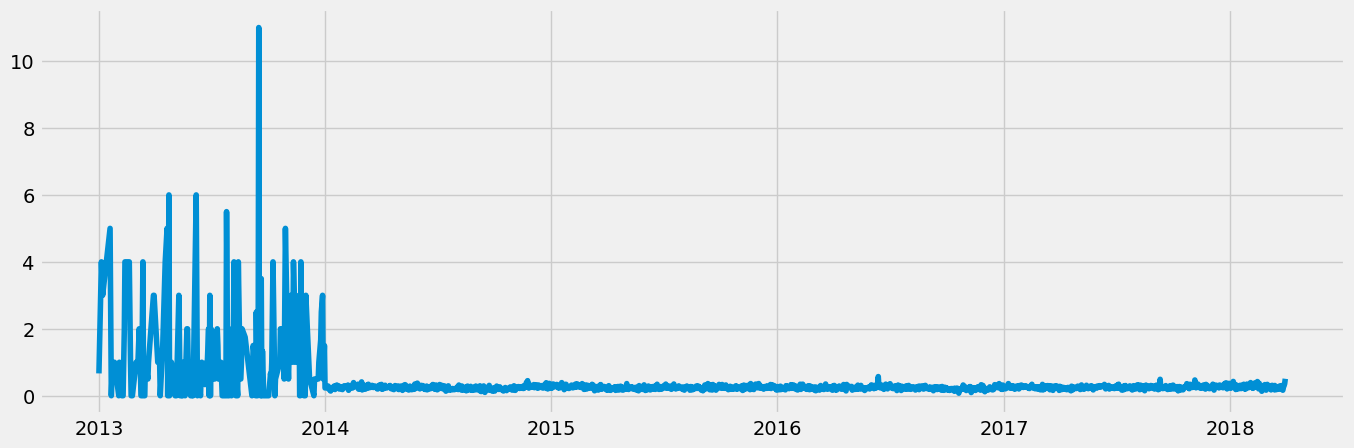

In [24]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/21/24

#Description: Plot the new data set 
"""

plt.figure(figsize=(15,5), dpi=100)
plt.plot(avg_incident)

In [25]:
#Adjusting datetime x-axis

result_4 = result_3.loc[(result_3['datetime'] >= '2014-01-01')]

In [26]:
result_4

,datetime,count_killed,avg_killed
176,2014-01-01,216,0.231481
177,2014-01-02,119,0.243697
178,2014-01-03,124,0.298387
179,2014-01-04,140,0.264286
180,2014-01-05,130,0.238462
...,...,...,...
1719,2018-03-27,91,0.164835
1720,2018-03-28,113,0.256637
1721,2018-03-29,94,0.297872
1722,2018-03-30,83,0.361446


In [27]:
count_killed = result_4.drop('avg_killed', axis=1) 

In [28]:
count_killed

,datetime,count_killed
176,2014-01-01,216
177,2014-01-02,119
178,2014-01-03,124
179,2014-01-04,140
180,2014-01-05,130
...,...,...
1719,2018-03-27,91
1720,2018-03-28,113
1721,2018-03-29,94
1722,2018-03-30,83


In [29]:
# Reset index so that you can use the "Date" column as a filter

count_killed_reset = count_killed.set_index('datetime')

In [30]:
count_killed_reset

,count_killed
datetime,
2014-01-01,216
2014-01-02,119
2014-01-03,124
2014-01-04,140
2014-01-05,130
...,...
2018-03-27,91
2018-03-28,113
2018-03-29,94


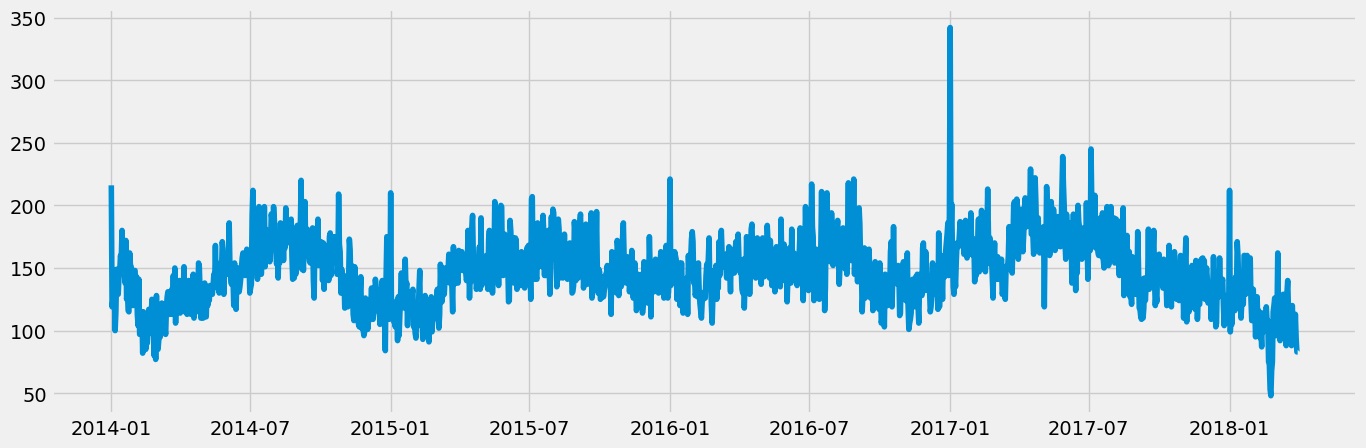

In [31]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(count_killed_reset)

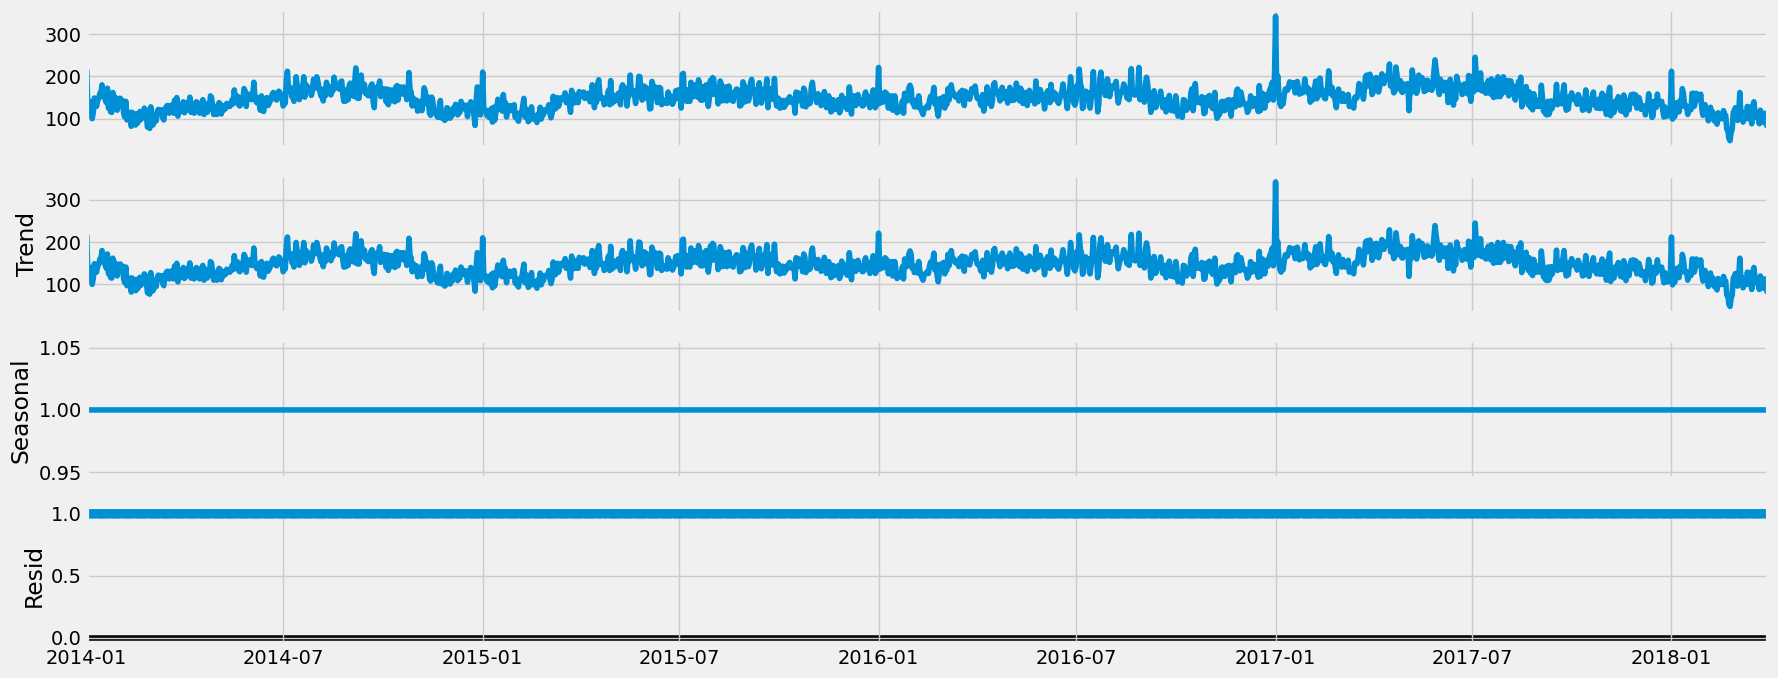

In [32]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/21/24

#Description: Decompose the time series 
"""


decomposition = sm.tsa.seasonal_decompose(count_killed_reset, model='multiplicative', period=1)

from pylab import rcParams # This will define a fixed size for all special charts.\n",

rcParams['figure.figsize'] = 18, 7


# Plot the separate components

decomposition.plot()
plt.show()

In [33]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/23/24

#Description: Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.
"""

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(count_killed_reset['count_killed'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.834744
p-value                           0.053480
Number of Lags Used              24.000000
Number of Observations Used    1523.000000
Critical Value (1%)              -3.434651
Critical Value (5%)              -2.863440
Critical Value (10%)             -2.567781
dtype: float64


In [34]:
# The null hypothesis and presense of a unit root is what I am trying to disprove. I am seeking to disprove there is a 
# unit root, which would mean that the data is stationary.  The presense of a unit root would mean the data is non stationary, 
# and that there is no unit root.

# Result: The p-value is not less than 0.05, so the test result is not significant. The p-value is 0.053.

# Significancce levels: Critical value 1% -3.43 is smaller than test statistic -2.83, null can't be rejected.
#                       Critical value 5% -2.86 is smaller than test statistic -2.83, null can't be rejected.
#                       Critical value 10% -2.56 is larger than test statistic -2.83, null can be rejected.

# When comparing the test statistic to the critical values, the test statistic is larger than the critical value at the 1% and 
# 5%, but not at 10 %. I also do not have a satifactory p value so the data needs to be stationarized.

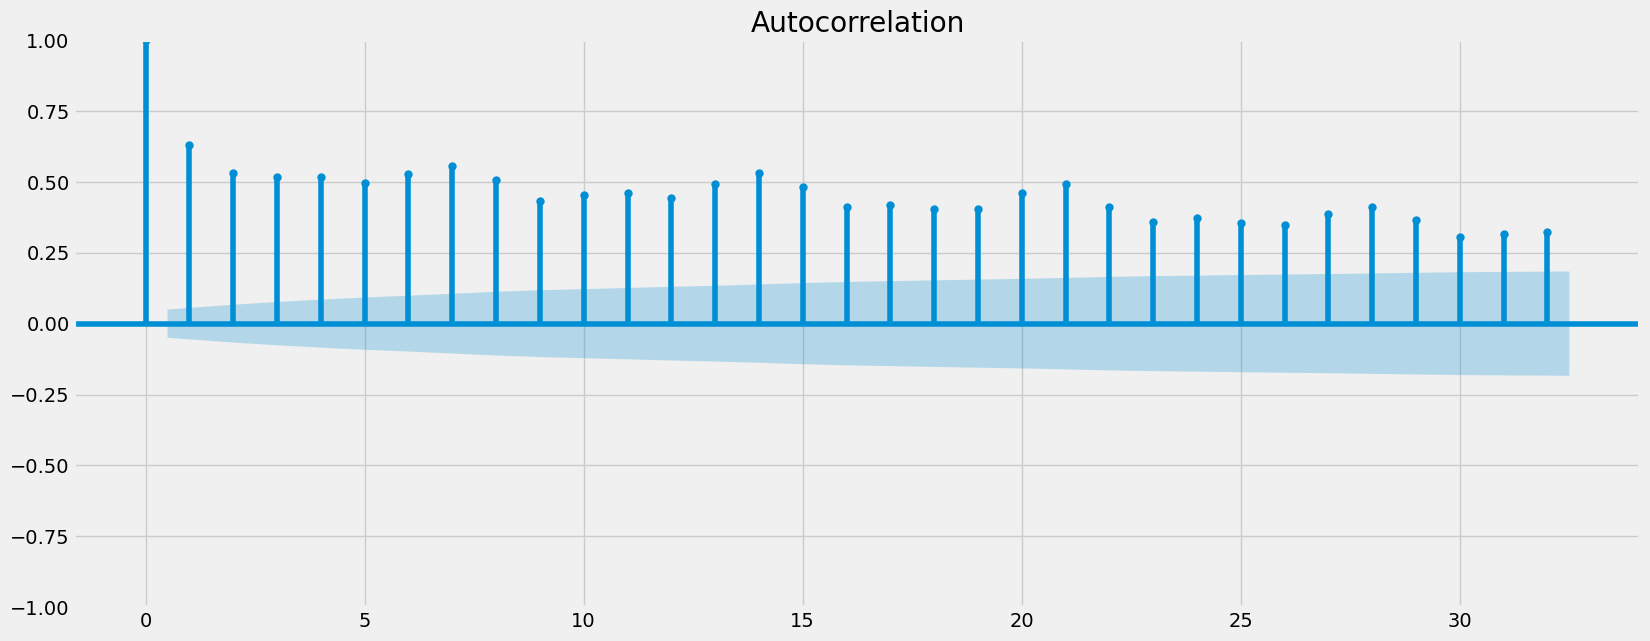

In [35]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(count_killed_reset)
plt.show()

In [36]:
#There are many lags above the confidence interval edge, which means there are many lags significantly correlated with each 
#other. Every line goes aboove the blue edge of the confidence interval, indicating that the data is non-stationary.

In [37]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/23/24

#Description: Conduct differencing to stationarize the data.
"""

data_diff = (count_killed_reset['count_killed']) - (count_killed_reset['count_killed']).shift(1)

In [38]:
# Remove missing values that come as a result of differencing
data_diff.dropna(inplace = True)

In [39]:
data_diff.head()

datetime
2014-01-02   -97.0
2014-01-03     5.0
2014-01-04    16.0
2014-01-05   -10.0
2014-01-06   -30.0
Name: count_killed, dtype: float64

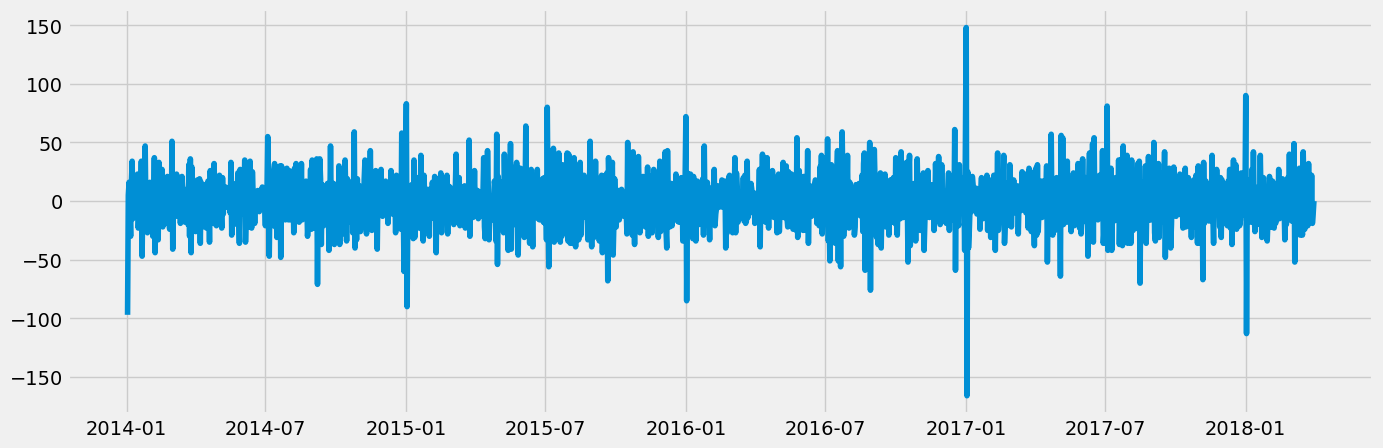

In [40]:
# Check out what the differencing did to the time-series 

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [41]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.839585e+00
p-value                        4.793045e-17
Number of Lags Used            2.300000e+01
Number of Observations Used    1.523000e+03
Critical Value (1%)           -3.434651e+00
Critical Value (5%)           -2.863440e+00
Critical Value (10%)          -2.567781e+00
dtype: float64


In [43]:
# New Result: The p-value is not less than 0.05, so the test result is not significant. The p-value is 4.79.

# Significancce levels: Critical value 1% -3.43 is bigger than test statistic -9.84, null can be rejected.
#                       Critical value 5% -2.86 is bigger than test statistic -9.84, null can be rejected.
#                       Critical value 10% -2.56 is bigger than test statistic -9.84, null can be rejected.

# When comparing the test statistic to the critical values, the test statistic is smaller than the critical value at all 
# significance levels now. 

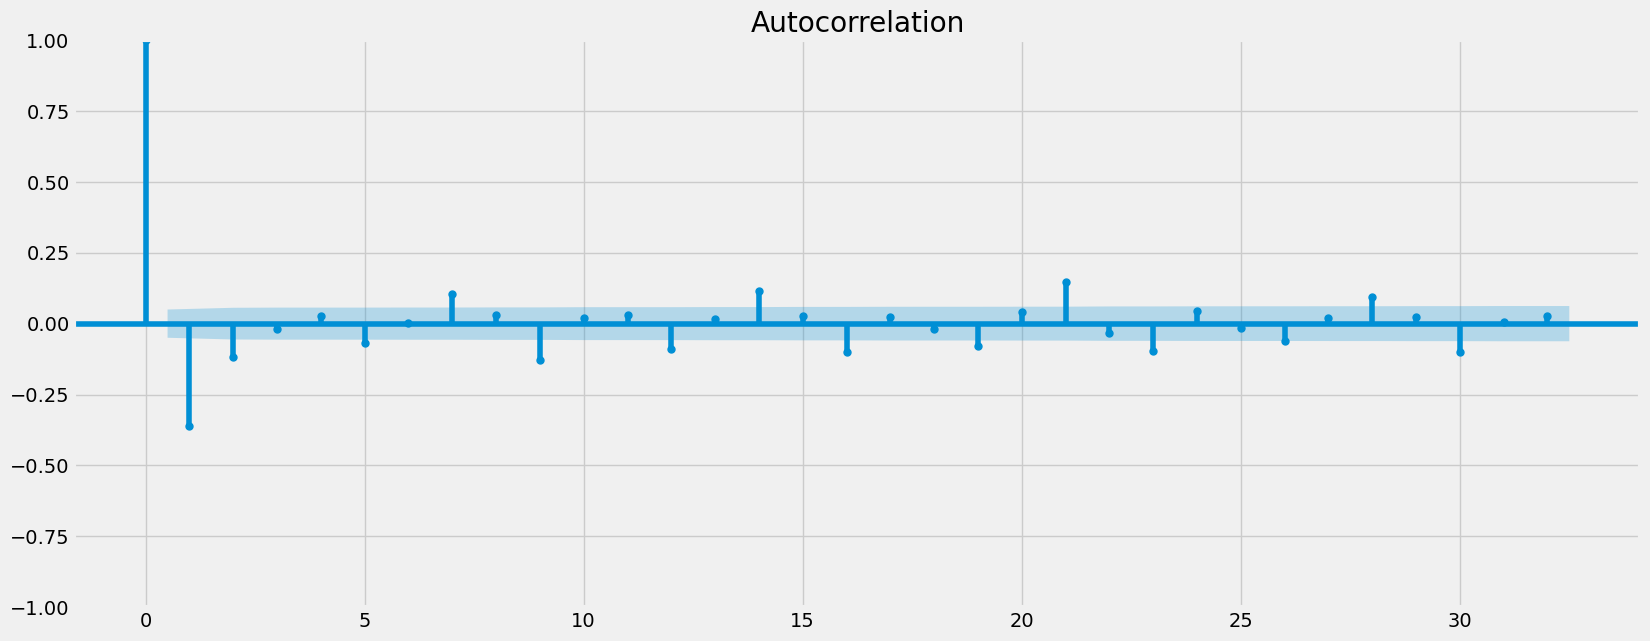

In [42]:
plot_acf(data_diff)
plt.show()